In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import scipy.stats as stats
sys.path.append('../')
from parameters import plotting_parameters
plt.rc('xtick', labelsize=plotting_parameters.axis_tick_size()) 
plt.rc('ytick', labelsize=plotting_parameters.axis_tick_size()) 

In [32]:
ML_integration_multiO = pd.read_csv('../../data/ML_AND_Integration_AND_Multiomics.csv')
ML_integration_multiO.head(1)

Unnamed: 0                                 Full name of paper  \
0           0  A gene prioritization method based on a swine ...   

                                          Doi  Year  Month  \
0  https://doi.org/10.1038/s42003-020-01233-4  2020      9   

              Author email TGCA?  Number citations  \
0  shzhao@mail.hzau.edu.cn   NaN                15   

                                 Other (state which)  Autoencoder  ...  \
0  integrates affinity matrix and network fusion ...          NaN  ...   

   Dataset  Dataset2  Dataset3  TCGA  OWN  OTHER  single-paper sets  \
0      OWN       NaN       NaN   NaN  1.0    NaN                NaN   

   Updated_DB_TCGA Updated_DB_Other  Updated_DB_exclude  
0              NaN              1.0                 NaN  

[1 rows x 206 columns]

In [33]:
ML_integration = pd.read_csv('../../data/ML_AND_Integration.csv', sep=';')
ML_integration.head(1)

Unnamed: 0  \
0  Machine learning-based integration of remotely...   

                          Doi  Year  Month  Author email  TGCA?  \
0  10.1016/j.agsy.2019.03.015  2019    7.0           NaN    NaN   

   Number citations Other (state which)  Autoencoder  \
0              95.0                 NaN          NaN   

  Convolutional neural network (no bottleneck)  ...  INFO GAIN RATIO  \
0                                          NaN  ...              NaN   

   INFO GAIN  Bagged trees  Physics-based ML  miRcorrNet  \
0        NaN           NaN               NaN         NaN   

   adaptive-network-based fuzzy inference system (ANFIS)   Pymatgen  Factsage  \
0                                                NaN            NaN       NaN   

   Aflow  Density functional theory  
0    NaN                        NaN  

[1 rows x 134 columns]

In [34]:
#Rename columns with long names
ML_integration_multiO= ML_integration_multiO.rename(columns={'Other Gradient Boosting Machines (excl the main algos XGBoost, lightGBM, Adaboost)': 'Other Gradient Boosting Machines'}) 
ML_integration = ML_integration.rename(columns={'Other Gradient Boosting Machines (excl the main algos XGBoost, lightGBM, Adaboost)': 'Other Gradient Boosting Machines'}) 

ML_integration = ML_integration.rename(columns={'Other Gradient Boosting Machines (excl the main algos XGBoost, lightGBM, Adaboost)': 'Other Gradient Boosting Machines'}) 
ML_integration = ML_integration.rename(columns={'adaptive-network-based fuzzy inference system (ANFIS) ':'ANFIS'}) 

ML_integration = ML_integration.rename(columns={'minimum redundancy and maximum relevance feature selection': 'Min redundancy max relevancy'}) 
ML_integration = ML_integration.rename(columns={'minimum redundancy and maximum relevance feature selection': 'Min redundancy max relevancy'}) 


In [35]:
# Keep only technique columns
technique_columns = ML_integration.columns[8:]

for col in ML_integration_multiO.columns:

    if col not in technique_columns:
        ML_integration_multiO = ML_integration_multiO.drop(col, axis=1)

In [36]:
ML_integration.head()

Unnamed: 0  \
0  Machine learning-based integration of remotely...   
1  Machine learning-based integration of large-sc...   
2  Integration of spectral... spatial and morphom...   
3  Analysis of Thermophysical Properties of Deep ...   
4  Multi-source data integration for soil mapping...   

                            Doi  Year  Month  Author email  TGCA?  \
0    10.1016/j.agsy.2019.03.015  2019    7.0           NaN    NaN   
1      10.1088/1748-9326/ab9e98  2020    8.0           NaN    NaN   
2  10.1016/j.jseaes.2017.05.005  2017    9.0           NaN    NaN   
3      10.1021/acs.jced.9b00555  2019    9.0           NaN    NaN   
4       10.5194/soil-5-107-2019  2019    3.0           NaN    NaN   

   Number citations Other (state which)  Autoencoder  \
0              95.0                 NaN          NaN   
1               NaN                 NaN          NaN   
2               NaN                 NaN          NaN   
3               NaN                 NaN          NaN   
4               NaN                 NaN          NaN   

  Convolutional neural network (no bottleneck)  ...  INFO GAIN RATIO  \
0                                          NaN  ...              NaN   
1                                          NaN  ...              NaN   
2                                          NaN  ...              NaN   
3                                          NaN  ...              NaN   
4                                            1  ...              NaN   

   INFO GAIN  Bagged trees  Physics-based ML  miRcorrNet  ANFIS  Pymatgen  \
0        NaN           NaN               NaN         NaN    NaN       NaN   
1        NaN           NaN               NaN         NaN    NaN       NaN   
2        NaN           NaN               NaN         NaN    NaN       NaN   
3        NaN           NaN               NaN         NaN    NaN       NaN   
4        NaN           NaN               NaN         NaN    NaN       NaN   

   Factsage  Aflow  Density functional theory  
0       NaN    NaN                        NaN  
1       NaN    NaN                        NaN  
2       NaN    NaN                        NaN  
3       NaN    NaN                        NaN  
4       NaN    NaN                        NaN  

[5 rows x 134 columns]

In [37]:
ML_integration_multiO.shape

(100, 117)

## Prepare data for ml + multiO

In [38]:
ML_integration_multiO = ML_integration_multiO.head(100)
ML_integration_multiO_sum_plot = ML_integration_multiO.sum()
ML_integration_multiO_sum_plot = ML_integration_multiO_sum_plot[ML_integration_multiO_sum_plot>0]
ML_integration_multiO_sum_plot = ML_integration_multiO_sum_plot.sort_values(ascending=False)
ML_integration_multiO_sum_plot

/var/folders/wl/hg987ghd6mz8h66gkk6xwp180000gn/T/ipykernel_13552/2201490330.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ML_integration_multiO_sum_plot = ML_integration_multiO.sum()


Autoencoder                         39.0
Cox-PH                              25.0
Random forest                       24.0
K-means clustering                  22.0
SVM                                 19.0
                                    ... 
Multiple Kernel Learning             1.0
Network constraints                  1.0
UMAP                                 1.0
Multiple Factor Analysis             1.0
Bayesian factor regression model     1.0
Length: 83, dtype: float64

Text(0.5, 1.0, 'Number of appearances in 100 papers for ML and integration and multiOmics')

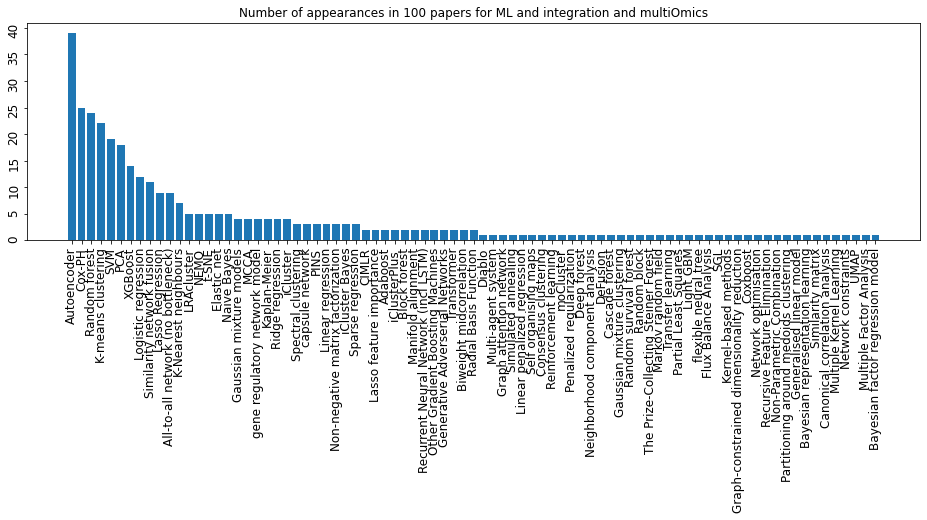

In [39]:
#Plot data
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(height=ML_integration_multiO_sum_plot, x= ML_integration_multiO_sum_plot.index)
axs.tick_params(labelrotation=90)
axs.set_title("Number of appearances in 100 papers for ML and integration and multiOmics")

## Prepare data for ML and integration

In [40]:
ML_integration_sum_plot = ML_integration.drop(['Unnamed: 0', 'Doi', 'Year', 
'Author email','Number citations', 'Month' ],axis=1)
ML_integration_sum_plot = ML_integration_sum_plot.sum()
ML_integration_sum_plot = ML_integration_sum_plot.sort_values(ascending=False)

/var/folders/wl/hg987ghd6mz8h66gkk6xwp180000gn/T/ipykernel_13552/3070039646.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ML_integration_sum_plot = ML_integration_sum_plot.sum()


Text(0.5, 1.0, 'Number of appearances in 100 papers for ML and data integration/fusion')

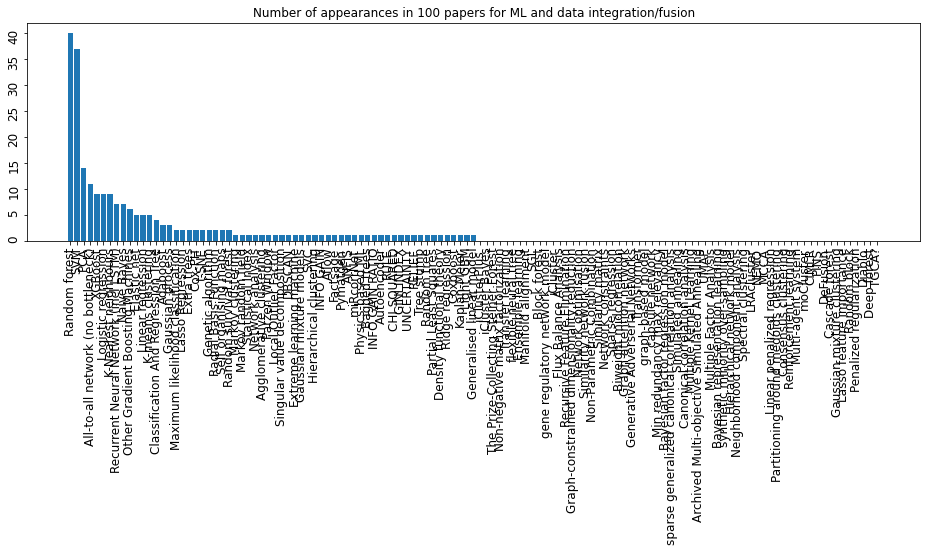

In [41]:
#Plot data
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(height=ML_integration_sum_plot, x= ML_integration_sum_plot.index)
axs.tick_params(labelrotation=90)
axs.set_title("Number of appearances in 100 papers for ML and data integration/fusion")

In [42]:
ML_integration_sum_plot_df = pd.DataFrame(ML_integration_sum_plot)
ML_integration_sum_plot_df["Technique"] = ML_integration_sum_plot_df.index
ML_integration_sum_plot_df["Count"] = ML_integration_sum_plot_df[0]
ML_integration_sum_plot_df = ML_integration_sum_plot_df.reset_index()
ML_integration_sum_plot_df = ML_integration_sum_plot_df.drop([0, "index"], axis=1)
ML_integration_sum_plot_df.head()

Technique  Count
0                       Random forest   40.0
1                                 SVM   37.0
2                                 PCA   14.0
3  All-to-all network (no bottleneck)   11.0
4                             XGBoost    9.0

In [43]:
ML_integration_multiO_sum_plot = pd.DataFrame(ML_integration_multiO_sum_plot)
ML_integration_multiO_sum_plot["Technique"] = ML_integration_multiO_sum_plot.index
ML_integration_multiO_sum_plot["Count"] = ML_integration_multiO_sum_plot[0]
ML_integration_multiO_sum_plot = ML_integration_multiO_sum_plot.reset_index()
ML_integration_multiO_sum_plot = ML_integration_multiO_sum_plot.drop([0, "index"], axis=1)
ML_integration_multiO_sum_plot.head()

Technique  Count
0         Autoencoder   39.0
1              Cox-PH   25.0
2       Random forest   24.0
3  K-means clustering   22.0
4                 SVM   19.0

In [44]:
merged_data_set = pd.merge(left = ML_integration_multiO_sum_plot, right = ML_integration_sum_plot_df, on="Technique", how="outer")
merged_data_set[:3]

Technique  Count_x  Count_y
0    Autoencoder     39.0      1.0
1         Cox-PH     25.0      2.0
2  Random forest     24.0     40.0

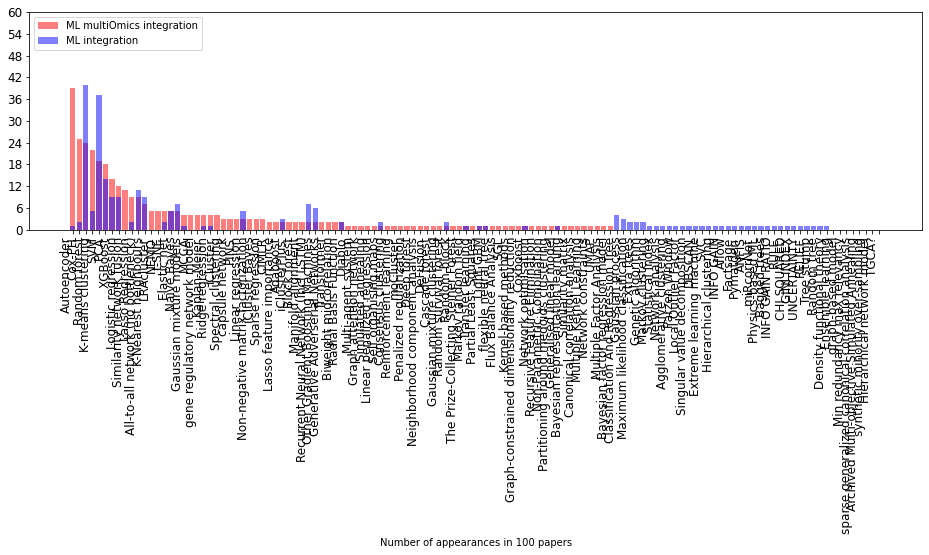

In [45]:
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(merged_data_set.Technique, merged_data_set.Count_x, color = 'r', label='ML multiOmics integration', alpha=0.5)
axs.bar(merged_data_set.Technique, merged_data_set.Count_y, color = 'b',  label='ML integration', alpha=0.5)
axs.set_xlabel("Number of appearances in 100 papers")
axs.set_yticks(np.linspace(0,60,11))
plt.xticks(rotation=90, ha='right')
axs.legend()

In [46]:
contingency_table = merged_data_set
contingency_table

Technique  Count_x  Count_y
0                                          Autoencoder     39.0      1.0
1                                               Cox-PH     25.0      2.0
2                                        Random forest     24.0     40.0
3                                   K-means clustering     22.0      5.0
4                                                  SVM     19.0     37.0
..                                                 ...      ...      ...
119  sparse generalized canonical correlation analysis      NaN      0.0
120       Archived Multi-objective Simulated Annealing      NaN      0.0
121                   synthetic minority over-sampling      NaN      0.0
122                         Hierarchical network model      NaN      0.0
123                                              TGCA?      NaN      0.0

[124 rows x 3 columns]

In [47]:
contingency_table = merged_data_set
contingency_table.index = contingency_table.Technique
contingency_table = contingency_table.drop(['Technique'],axis=1)
contingency_table = contingency_table.T
contingency_table = contingency_table.fillna(0)
contingency_table.index = ['Multi-omics', 'General']
contingency_table.head()

Technique    Autoencoder  Cox-PH  Random forest  K-means clustering   SVM  \
Multi-omics         39.0    25.0           24.0                22.0  19.0   
General              1.0     2.0           40.0                 5.0  37.0   

Technique     PCA  XGBoost  Logistic regression  Similarity network fusion  \
Multi-omics  18.0     14.0                 12.0                       11.0   
General      14.0      9.0                  9.0                        0.0   

Technique    Lasso Regression  ...  Random tree  Density functional theory  \
Multi-omics               9.0  ...          0.0                        0.0   
General                   2.0  ...          1.0                        1.0   

Technique    Ensemble learning  graph-based model  \
Multi-omics                0.0                0.0   
General                    0.0                0.0   

Technique    Min redundancy max relevancy  \
Multi-omics                           0.0   
General                               0.0   

Technique    sparse generalized canonical correlation analysis  \
Multi-omics                                                0.0   
General                                                    0.0   

Technique    Archived Multi-objective Simulated Annealing  \
Multi-omics                                           0.0   
General                                               0.0   

Technique    synthetic minority over-sampling  Hierarchical network model  \
Multi-omics                               0.0                         0.0   
General                                   0.0                         0.0   

Technique    TGCA?  
Multi-omics    0.0  
General        0.0  

[2 rows x 124 columns]

In [48]:
contingency_table_1 = pd.DataFrame(contingency_table.Autoencoder)
contingency_table_1['Non_autoencoder'] = 50 -contingency_table_1['Autoencoder']
contingency_table_1

Autoencoder  Non_autoencoder
Multi-omics         39.0             11.0
General              1.0             49.0

In [49]:
contig1 = contingency_table_1.values
contig1

array([[39., 11.],
       [ 1., 49.]])

https://towardsdatascience.com/fishers-exact-test-from-scratch-with-python-2b907f29e593

In [50]:
oddsratio, pvalue = stats.fisher_exact(contig1)  
pvalue

2.732325374718579e-16

In [51]:
p_values = []

for technique in contingency_table.columns:

    contingency_table_single = pd.DataFrame(contingency_table[technique])
    contingency_table_single['Non_' + technique] = 100 - contingency_table_single[technique]

    contig_values = contingency_table_single.values 

    oddsratio, pvalue = stats.fisher_exact(contig_values) 
    
    print(technique)
    print(pvalue)

    p_values.append(pvalue)
    

Autoencoder
8.927493776504001e-13
Cox-PH
1.2974235132648017e-06
Random forest
0.022599257230607666
K-means clustering
0.0006767690633096161
SVM
0.007121381580971588
PCA
0.5633562868256389
XGBoost
0.37568814409145534
Logistic regression
0.6454776047425426
Similarity network fusion
0.0007304457436274371
Lasso Regression
0.058220717580287525
All-to-all network (no bottleneck)
0.8142977929603796
K-Nearest neighbours
0.7952813083492218
LRAcluster
0.059383210468586585
NEMO
0.059383210468586585
t-SNE
0.4447540317754331
Elastic net
1.0
Naive Bayes
0.7673444346427294
Gaussian mixture models
0.36867076499247503
MCCA
0.12124072137336428
gene regulatory network model
0.12124072137336428
Kaplan-Meier
0.36867076499247503
Ridge regression
0.36867076499247503
iCluster
0.12124072137336428
Spectral clustering
0.24623115577889448
capsule network
0.24623115577889448
PINS
0.24623115577889448
Linear regression
0.72093855483014
Non-negative matrix factorization
0.24623115577889448
iCluster Bayes
0.2462311557

In [52]:
colour = plotting_parameters.standard_bar_colour()

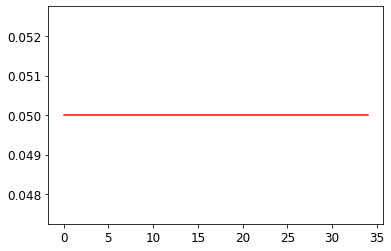

In [53]:
steps=100
end = 34
x = np.linspace(0,end,steps)
y = np.repeat(0.05,steps)
plt.plot(x, y, '-r', label='y=2x+1')

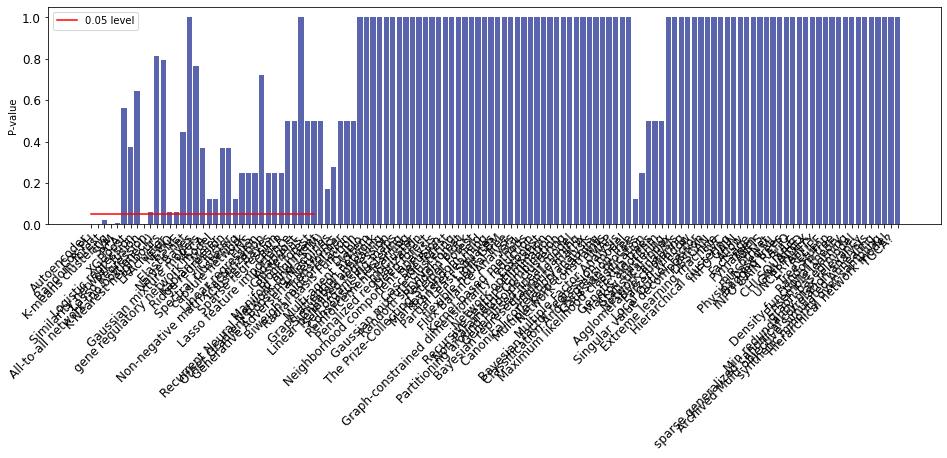

In [54]:
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(x=contingency_table.columns, height=p_values, color = colour)
axs.plot(x, y, '-r', label='0.05 level')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.ylabel("P-value")
plt.savefig("../../figures/Statistics.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/Statistics.pdf", dpi=400, bbox_inches = "tight")

In [55]:
p_values_log10_negative = -np.log10(p_values)
p_values_log10_negative

array([12.04927044,  5.88691824,  1.64590583,  3.1695595 ,  2.14743574,
        0.24921685,  0.42517251,  0.19011882,  3.13641204,  1.23492245,
        0.08921674,  0.09947922,  1.22633633,  1.22633633,  0.35188011,
       -0.        ,  0.11500965,  0.4333613 ,  0.91635149,  0.91635149,
        0.4333613 ,  0.4333613 ,  0.91635149,  0.608657  ,  0.608657  ,
        0.608657  ,  0.14210175,  0.608657  ,  0.608657  ,  0.608657  ,
        0.30321788,  0.30321788, -0.        ,  0.30321788,  0.30321788,
        0.30321788,  0.77026627,  0.55432837,  0.30321788,  0.30321788,
        0.30321788, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [56]:
-np.log10(0.05)

1.3010299956639813

In [57]:
num_tests = len(p_values_log10_negative)
num_tests

124

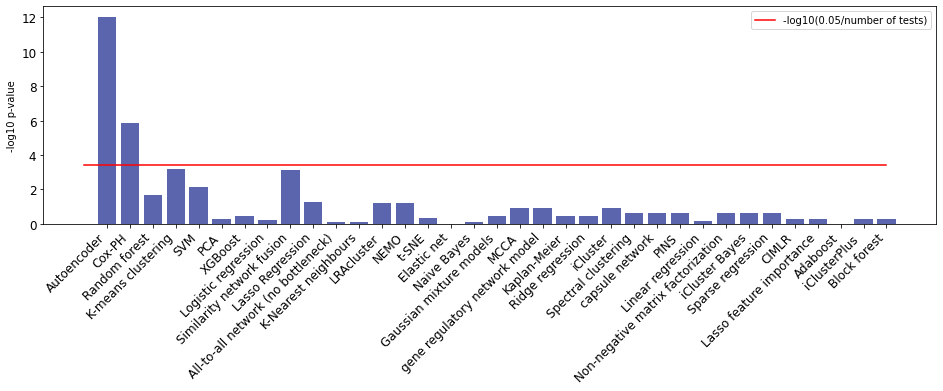

In [58]:
steps=100
end = 34
level = -np.log10(0.05/num_tests) # bonferroni
#how many values to show
num_techs = 35

x = np.linspace(-1,end,steps)
y = np.repeat(level,steps)

fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(x=contingency_table.columns[:num_techs], height=p_values_log10_negative[:num_techs], color = colour)
axs.plot(x, y, '-r', label='-log10(0.05/number of tests)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.ylabel("-log10 p-value")
plt.savefig("../../figures/Statistics_inverted.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/Statistics_inverted.pdf", dpi=400, bbox_inches = "tight")

In [59]:
p_values_log10_negative

array([12.04927044,  5.88691824,  1.64590583,  3.1695595 ,  2.14743574,
        0.24921685,  0.42517251,  0.19011882,  3.13641204,  1.23492245,
        0.08921674,  0.09947922,  1.22633633,  1.22633633,  0.35188011,
       -0.        ,  0.11500965,  0.4333613 ,  0.91635149,  0.91635149,
        0.4333613 ,  0.4333613 ,  0.91635149,  0.608657  ,  0.608657  ,
        0.608657  ,  0.14210175,  0.608657  ,  0.608657  ,  0.608657  ,
        0.30321788,  0.30321788, -0.        ,  0.30321788,  0.30321788,
        0.30321788,  0.77026627,  0.55432837,  0.30321788,  0.30321788,
        0.30321788, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  